In [ ]:
# By analyzing the models in models.ipynb, it's possible to see that the Decision Tree (DT) has the best Precision (83%) but not the best Recall (76%).
# In contrast, the Autoencoder (AE) has the best Recall (83%) but a low Precision.
# To achieve the best of both worlds, we will combine the two models into an 'Ensemble Model' to optimize the overall performance (Precision and Recall).

In [86]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('creditcard.csv', na_values="?")
# Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Dataset overview
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
# Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
# V1-V28: Anonymized features representing various transaction attributes (e.g., location, etc.)
# Amount: The transaction amount
# Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [51]:
# Pre-processing

In [52]:
samples, features = df.shape
print(f"Number of samples: {samples}")
print(f"Number of features: {features}")

Number of samples: 284807
Number of features: 31


In [53]:
# The number of qualitative and quantitive features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [54]:
# the mean of each feature
for col in df.columns:
    print(col, df[col].mean())


Time 94813.85957508067
V1 1.1683749838001528e-15
V2 3.416908049651284e-16
V3 -1.379536707896593e-15
V4 2.0740951198584196e-15
V5 9.604066317127324e-16
V6 1.4873130132010145e-15
V7 -5.556467295694611e-16
V8 1.2134813634275587e-16
V9 -2.4063305498905906e-15
V10 2.2390527426993533e-15
V11 1.673326932726423e-15
V12 -1.2470117695222676e-15
V13 8.190001274383203e-16
V14 1.2072942051600827e-15
V15 4.887455859804944e-15
V16 1.4377159541859243e-15
V17 -3.7721706856547467e-16
V18 9.564149167014576e-16
V19 1.0399166050935636e-15
V20 6.406203628719748e-16
V21 1.654066907797022e-16
V22 -3.568593220079729e-16
V23 2.5786478972835623e-16
V24 4.473265530947536e-15
V25 5.340914685085768e-16
V26 1.6834371984034178e-15
V27 -3.6600908126037946e-16
V28 -1.2273899954199695e-16
Amount 88.34961925093133
Class 0.001727485630620034


In [55]:
# Searching null values in samples
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [56]:
# Normalizing amount and time values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])
df["Time_scaled"] = scaler.fit_transform(df[["Time"]])

df.drop(columns=["Amount"], inplace=True)
df.drop(columns=["Time"], inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


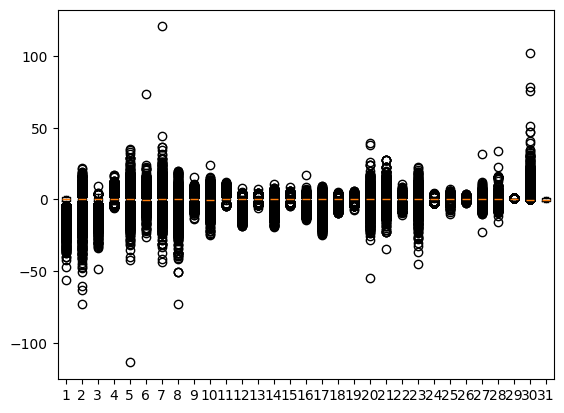

In [57]:
# Looking for outliers
import matplotlib.pyplot as plt

plt.boxplot(df)
plt.show()


In [58]:
# Based on the box plot, it is possible to see that there are outliers in most features, which represent potential anomalies to be target by models

In [59]:
# Separation of feature and label
X = df.drop(columns=["Class"]) # Feature
Y = df['Class'] # Label

<Axes: >

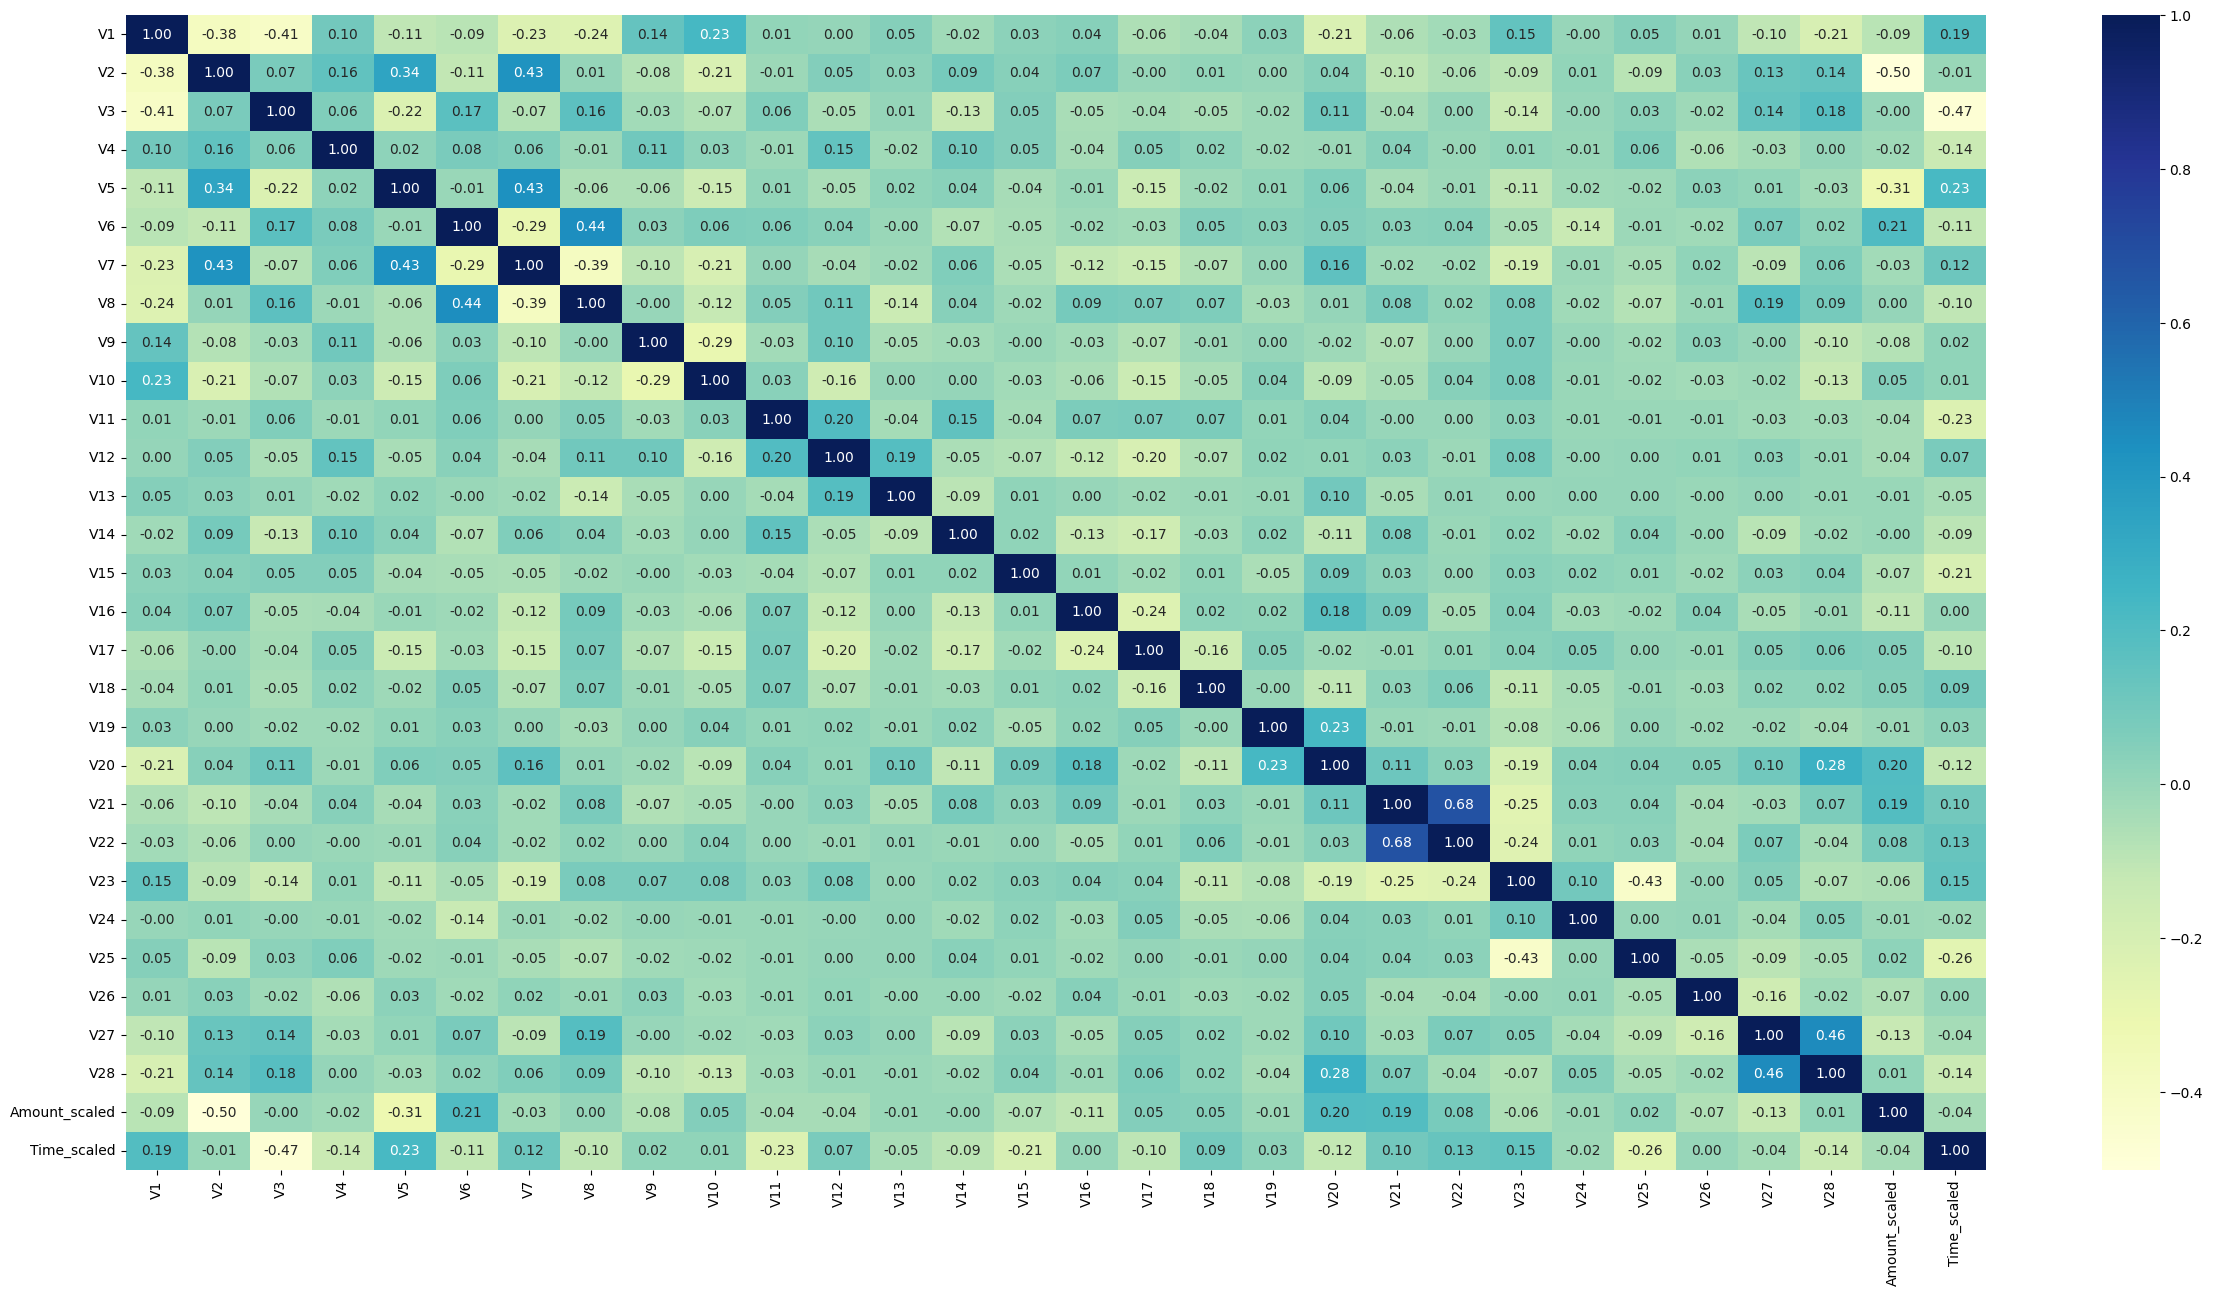

In [60]:
# Looking for correlations
import seaborn as sns

corr = X.corr(method="spearman")
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")

In [61]:
# Based on the heatmap, it is possible to see that there are no strong correaltions in the dataset

In [62]:
# Data Modeling - Supervised

In [63]:
# Separating data for training
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.75, random_state=42, stratify=Y
)

In [64]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Create model and train the model
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
# Prediction
Y_pred_tree = tree.predict(X_test)

In [67]:
# Get only the values that decision tree appoint as fraud 
X_tree = X_test[Y_pred_tree == 1]
Y_tree = Y_test[Y_pred_tree == 1]
X_tree

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
189487,0.095646,3.195863,-3.450093,3.509292,4.111129,-1.163245,2.276303,-0.431287,-2.769691,-2.115430,...,-0.284996,-0.635752,-0.574049,-1.801206,0.216142,0.090617,-0.072939,-0.029748,-0.350151,0.707718
69498,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,...,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,-0.321245,-0.871016
249963,-0.679521,4.672553,-6.814798,7.143500,0.928654,-1.873013,-2.306689,0.993702,-4.944054,-5.576419,...,0.566849,-0.321691,-0.281325,-1.120256,-0.073394,0.553530,0.760542,0.386742,-0.350151,1.260172
77099,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,-3.555835,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,-0.333239,-0.798661
16851,-0.459787,2.869443,-5.412617,3.893741,-1.920080,-2.759995,-4.260113,0.878554,-2.636499,-7.139539,...,0.784098,-0.552383,-0.281806,-0.057908,1.077772,-0.198859,1.163969,0.610418,-0.349231,-1.402055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167305,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,0.070128,0.500950
88876,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,-2.126973,...,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,-0.349231,-0.684043
6899,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,-7.191604,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,-0.349231,-1.809631
154587,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,...,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,-0.353229,0.153726


In [69]:
# Data Modeling - Unsupervised

In [70]:
# Train only with normal class (0)
X_train = X[Y == 0]
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,1.641974


In [71]:
# Autoencoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
input_dim = X_train.shape[1] # Number of features
input_dim

30

In [73]:
input_layer = Input(shape=(input_dim,)) # Creates the input tensor with shape=(30,). This defines the fixed number of features for all incoming data points.
input_layer

<KerasTensor shape=(None, 30), dtype=float32, sparse=False, ragged=False, name=keras_tensor_11>

In [74]:
# Compression Layer (Encoder)
encoder = Dense(64, activation="relu", activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)
encoder = Dropout(0.2)(encoder) # Reduces overfitting and improves generalization
encoder = BatchNormalization()(encoder) # Helps stabilize training and better reconstruction
latent = Dense(8, activation="relu")(encoder)

In [75]:
# Uncompression Layer (Decoder)
decoder = Dense(16, activation="relu")(latent)
decoder = Dense(32, activation="relu")(decoder)
decoder = Dense(64, activation="relu")(decoder)

In [76]:
output_layer = Dense(input_dim, activation="linear")(decoder) # Output layer must match the input dimension (30) to reconstruct the original vector.

In [77]:
autoencoder = Model(inputs=input_layer, outputs=output_layer) # creating a complete neural network model
autoencoder.compile(optimizer='adam', loss='mse') # Tells how the model will learn
    # adam: Automatically adjust the learning rate
    # mse: Calculate how different the output is from the input

In [78]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # will stop the training if the metrics stops improving on the metric
history = autoencoder.fit( # The model tries to learn to reconstruct normal transactions
    X_train, # Input
    X_train, # Output
    epochs=50, # Maximum numbers of training
    batch_size=100, # Number of samples processed before updating the weights. Affects stability and training time.
    shuffle=True, # Shuffles the data
    validation_split=0.1, # Uses 10% of X_train to calculate validation error.
    callbacks=[es], # Stop the training if the metrics stops improving on the metric
    verbose=1 # Show Progress
)

Epoch 1/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.6117 - val_loss: 0.4212
Epoch 2/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5089 - val_loss: 0.3709
Epoch 3/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.4794 - val_loss: 0.3269
Epoch 4/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4567 - val_loss: 0.3117
Epoch 5/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.4404 - val_loss: 0.3058
Epoch 6/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4328 - val_loss: 0.3100
Epoch 7/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4217 - val_loss: 0.2901
Epoch 8/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4162 - val_loss: 0.2821
Epoch 9/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4140 - val_loss: 0.2958
Epoch 10/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4060 - val_loss: 0.2940
Epoch 11/50
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4029 - val_loss: 0.3065
Epoch 12/50
2559/2559 ━━━━━━

In [79]:
# the model tries to reconstruct all samples, both normal and fraud.
reconstructions = autoencoder.predict(X) # output reconstructed by the autoencoder
mse = np.mean(np.power(X - reconstructions, 2), axis=1) # 1D vector where each value represents the reconstruct error of a transaction

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 786us/step


In [80]:
mse_train = np.mean(np.power(X_train - autoencoder.predict(X_train), 2), axis=1) # 1D vector where each value represents the reconstruct error of a normal transaction 
threshold = np.percentile(mse_train, 99) # Defines the limit between what is considered normal and anomalous.

8885/8885 ━━━━━━━━━━━━━━━━━━━━ 8s 926us/step


In [82]:
# It's time to use X_tree
reconstructions_tree = autoencoder.predict(X_tree)
mse_tree = np.mean(np.power(X_tree - reconstructions_tree, 2), axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [83]:
preds_auto = (mse_tree > threshold).astype(int) # Final predictions

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


print(classification_report(Y_tree, preds_auto))
print("AUC (MSE as score):", roc_auc_score(Y_tree, mse_tree))
print("Confusion matrix\n", confusion_matrix(Y_tree, preds_auto))

              precision    recall  f1-score   support

           0       0.50      0.14      0.22        56
           1       0.85      0.97      0.91       279

    accuracy                           0.83       335
   macro avg       0.67      0.56      0.56       335
weighted avg       0.79      0.83      0.79       335

AUC (MSE as score): 0.6881720430107527
Confusion matrix
 [[  8  48]
 [  8 271]]


| Metrics | Value | Meaning |
| :--- | :--- | :--- |
| **Recall (Sensitivity) - Fraud** | **0.97** | 97% of the actual frauds were detected by the model. This is a great result, meaning that only 3% of the frauds were missed by the model. |
| **Precision - Fraud** | **0.85** | Of all transactions the model classified as fraud, 85% were actually fraud. This means that the 15% were erroneously flagged as fraud (False Positives). |
| **F1-Score - Fraud** | **0.91** | The F1-Score is a great result. This means that the model is effective. |
| **AUC** | **0.6881720430107527** | The model has an 69% chance of correctly classifying a real fraud. |
| **Support** | **279** | The number of actual frauds. |
| **TN (True Negative)** | **8** | Normal transactions correctly recognized as normal. |
| **FP (False Positive)** | **48** | Normal transactions that the model marked as fraud. |
| **FN (False Negative)** | **8** | Frauds that the model missed. |
| **TP (True Positive)** | **271** | Frauds correctly detected as frauds. |